<a href="https://colab.research.google.com/github/JulTob/AI/blob/master/Analisis_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
R.version.string

[1] "R version 4.5.1 (2025-06-13)"


# Práctica 3

In [5]:
%%R
library(ggplot2)
library(readr)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Ejercicio 1

### 1. Importar los datos
Importamos la información del Directorio Central de Empresas (DIRCE) para la provincia de Alicante.

ón del Directorio Central de Empresas (DIRCE) para la provincia de Alicante.

Tipo empresa | Codigo | Frecuencia absoluta
----| --- | ----
Sociedad Anónima| SA| 2173
Sociedad Responsabilidad Limitada| SRL| 49088
Sociedad Colectiva| SCol| 15
Sociedad Comandataria| SCom| 3
Comunidad de Bienes| CB| 4783
Sociedad Cooperativa| SCoop| 752
Asociaciones y otros tipos| Asoc| 3081
Organismo Autónomos y otros| OrgAut| 219
Personas Físicas| PerF| 72092

### Tipo de variable

Variable Categórica Cualitativa Nominal: El tipo de empresa

### Nivel de Medición

Nivel de Medición Nominal

### Tabla de Frecuencias

In [6]:
%%R
tipo_empresa <- c("SA", "SRL", "SCol", "SCom", "CB", "SCoop", "Asoc", "OrgAut", "PerF")
ni <- c(2173, 49088, 15, 3, 4783, 752, 3081, 219, 72092)

datos <- data.frame(tipo_empresa, ni)
datos

  tipo_empresa    ni
1           SA  2173
2          SRL 49088
3         SCol    15
4         SCom     3
5           CB  4783
6        SCoop   752
7         Asoc  3081
8       OrgAut   219
9         PerF 72092


Añadimos la frecuencia con cuatro decimales

In [7]:
%%R
datos$fi <- round(datos$ni / sum(datos$ni), 4)
datos

  tipo_empresa    ni     fi
1           SA  2173 0.0164
2          SRL 49088 0.3713
3         SCol    15 0.0001
4         SCom     3 0.0000
5           CB  4783 0.0362
6        SCoop   752 0.0057
7         Asoc  3081 0.0233
8       OrgAut   219 0.0017
9         PerF 72092 0.5453


O de manera porcentual:

In [8]:
%%R
datos$fi_porc <- round(datos$fi * 100, 2)
datos

  tipo_empresa    ni     fi fi_porc
1           SA  2173 0.0164    1.64
2          SRL 49088 0.3713   37.13
3         SCol    15 0.0001    0.01
4         SCom     3 0.0000    0.00
5           CB  4783 0.0362    3.62
6        SCoop   752 0.0057    0.57
7         Asoc  3081 0.0233    2.33
8       OrgAut   219 0.0017    0.17
9         PerF 72092 0.5453   54.53


### Gráfico de Barras (Histograma)

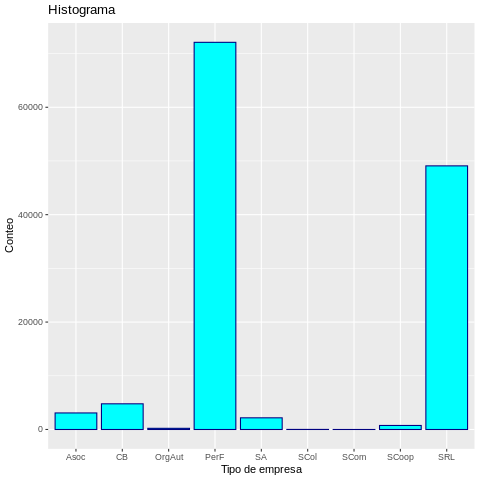

In [9]:
%%R
ggplot(datos, aes(x = tipo_empresa, y = ni)) +
  geom_bar(stat = "identity", color = "navy", fill = "cyan") +
  xlab("Tipo de empresa") +
  ylab("Conteo") +
  ggtitle("Histograma")

Podemos visualizar los datos de más peso en el porcentaje con un gráfico circular (pie chart):

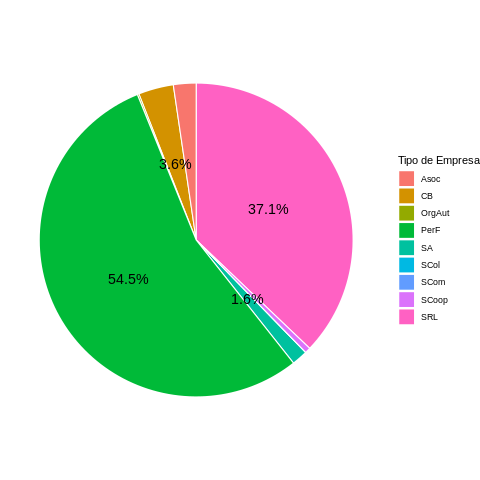

In [10]:
%%R
ggplot(datos, aes("", fi_porc, fill = tipo_empresa)) +
  geom_col(width = 1, color = "white") +
  coord_polar(theta = "y") +
  geom_text(aes(label = scales::percent(fi, accuracy = 0.1)),
            position = position_stack(vjust = 0.5),
            check_overlap = TRUE,
            size = 5) +
  guides(fill = guide_legend(title = "Tipo de Empresa")) +
  theme_void()


Podemos comparar estos métodos de representación y ver que en ambos perdemos visibilidad de 'los pequeños jugadores' del sector. Pueden dar una idea general de los grandes sectores, pero se pierde granularidad en la interpretación.


# Ejercicio 2
Para realizar la práctica importamos las bases de datos.

In [11]:
%%R
bd_satisfaccion <- read_delim("/content/data/bd_satisfaccion.csv",   delim = ";", escape_double = FALSE, trim_ws = TRUE)

Rows: 550 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (3): Satisfaccion_Calidad, Satisfaccion_Atencion, Satisfaccion_Precio
dbl (1): ID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Podemos hacernos una idea orientativa de los datos viendo las entradas:

In [12]:
%%R
head(bd_satisfaccion)

# A tibble: 6 × 4
     ID Satisfaccion_Calidad Satisfaccion_Atencion Satisfaccion_Precio
  <dbl> <chr>                <chr>                 <chr>              
1     1 Neutral              Satisfecho            Muy satisfecho     
2     2 Neutral              Neutral               Muy satisfecho     
3     3 Insatisfecho         Satisfecho            Satisfecho         
4     4 Insatisfecho         Muy satisfecho        Neutral            
5     5 Neutral              Muy satisfecho        Neutral            
6     6 Muy satisfecho       Satisfecho            Muy insatisfecho   


Podemos visualizar los datos con histogramas ordenados por nivel de satisfacción.


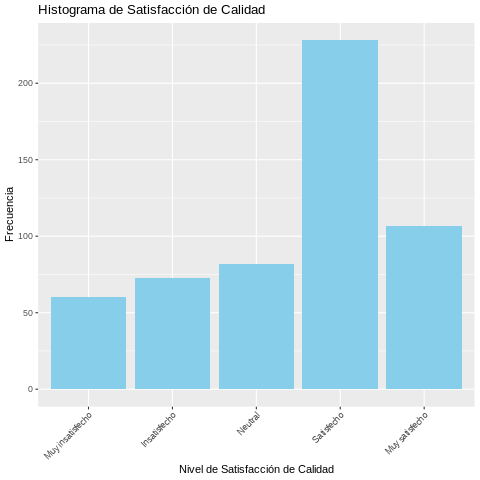

In [13]:
%%R
# Histograma de Satisfaccion_Calidad
satisfaccion_calidad_counts <- bd_satisfaccion %>%
  count(Satisfaccion_Calidad) %>%
  mutate(Satisfaccion_Calidad = factor(Satisfaccion_Calidad, levels = c("Muy insatisfecho", "Insatisfecho", "Neutral", "Satisfecho", "Muy satisfecho"))) %>%
  arrange(Satisfaccion_Calidad)

ggplot(satisfaccion_calidad_counts, aes(x = Satisfaccion_Calidad, y = n)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  xlab("Nivel de Satisfacción de Calidad") +
  ylab("Frecuencia") +
  ggtitle("Histograma de Satisfacción de Calidad") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

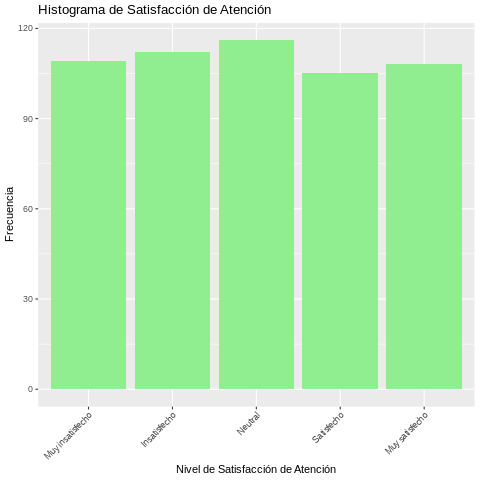

In [14]:
%%R
# Histograma de Satisfaccion_Atencion
satisfaccion_atencion_counts <- bd_satisfaccion %>%
  count(Satisfaccion_Atencion) %>%
  mutate(Satisfaccion_Atencion = factor(Satisfaccion_Atencion, levels = c("Muy insatisfecho", "Insatisfecho", "Neutral", "Satisfecho", "Muy satisfecho"))) %>%
  arrange(Satisfaccion_Atencion)

ggplot(satisfaccion_atencion_counts, aes(x = Satisfaccion_Atencion, y = n)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  xlab("Nivel de Satisfacción de Atención") +
  ylab("Frecuencia") +
  ggtitle("Histograma de Satisfacción de Atención") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

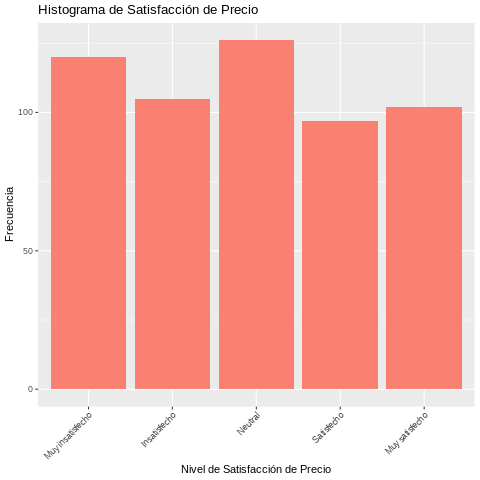

In [15]:
%%R
# Histograma de Satisfaccion_Precio
satisfaccion_precio_counts <- bd_satisfaccion %>%
  count(Satisfaccion_Precio) %>%
  mutate(Satisfaccion_Precio = factor(Satisfaccion_Precio, levels = c("Muy insatisfecho", "Insatisfecho", "Neutral", "Satisfecho", "Muy satisfecho"))) %>%
  arrange(Satisfaccion_Precio)

ggplot(satisfaccion_precio_counts, aes(x = Satisfaccion_Precio, y = n)) +
  geom_bar(stat = "identity", fill = "salmon") +
  xlab("Nivel de Satisfacción de Precio") +
  ylab("Frecuencia") +
  ggtitle("Histograma de Satisfacción de Precio") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

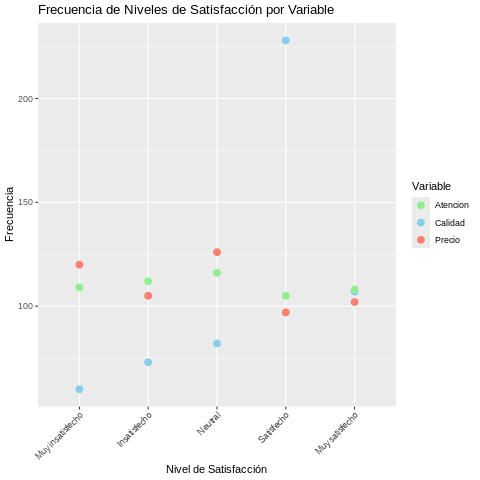

In [16]:
%%R
# Calculate frequency tables for all three satisfaction variables
satisfaccion_calidad_counts <- bd_satisfaccion %>%
  count(Satisfaccion_Calidad) %>%
  mutate(Satisfaccion_Calidad = factor(Satisfaccion_Calidad, levels = c("Muy insatisfecho", "Insatisfecho", "Neutral", "Satisfecho", "Muy satisfecho"))) %>%
  mutate(Variable = "Calidad") %>%
  rename(Level = Satisfaccion_Calidad)

satisfaccion_atencion_counts <- bd_satisfaccion %>%
  count(Satisfaccion_Atencion) %>%
  mutate(Satisfaccion_Atencion = factor(Satisfaccion_Atencion, levels = c("Muy insatisfecho", "Insatisfecho", "Neutral", "Satisfecho", "Muy satisfecho"))) %>%
  mutate(Variable = "Atencion") %>%
  rename(Level = Satisfaccion_Atencion)

satisfaccion_precio_counts <- bd_satisfaccion %>%
  count(Satisfaccion_Precio) %>%
  mutate(Satisfaccion_Precio = factor(Satisfaccion_Precio, levels = c("Muy insatisfecho", "Insatisfecho", "Neutral", "Satisfecho", "Muy satisfecho"))) %>%
  mutate(Variable = "Precio") %>%
  rename(Level = Satisfaccion_Precio)

# Combine the frequency tables
combined_satisfaccion_counts <- bind_rows(satisfaccion_calidad_counts, satisfaccion_atencion_counts, satisfaccion_precio_counts)

# Create the point plot
ggplot(combined_satisfaccion_counts, aes(x = Level, y = n, color = Variable, group = Variable)) +
  geom_point(size = 3) +
  xlab("Nivel de Satisfacción") +
  ylab("Frecuencia") +
  ggtitle("Frecuencia de Niveles de Satisfacción por Variable") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_color_manual(values = c("Calidad" = "skyblue", "Atencion" = "lightgreen", "Precio" = "salmon"))

La variable "Satisfaccion_Calidad" es una Variable Categórica Cualitativa Ordinal.

- Es **Categórica Cualitativa** porque refleja una cualidad característica (nivel de satisfacción), no un valor numérico.

- Es Ordinal porque las categorías están ordenadas (de "Muy insaatisfecho"  a "Muy satisfecho").



### c) Construye la tabla de frecuencia adecuada para esa variable



In [17]:
%%R
# Calculate frequency table for Satisfaccion_Calidad
satisfaccion_calidad_freq <- bd_satisfaccion %>%
  count(Satisfaccion_Calidad) %>%
  mutate(
    fi = n / sum(n), # Relative frequency
    fi_porc = fi * 100 # Percentage
  ) %>%
  mutate(Satisfaccion_Calidad = factor(Satisfaccion_Calidad, levels = c("Muy insatisfecho", "Insatisfecho", "Neutral", "Satisfecho", "Muy satisfecho"))) %>%
  arrange(Satisfaccion_Calidad)

# Display the frequency table
print(satisfaccion_calidad_freq)

# A tibble: 5 × 4
  Satisfaccion_Calidad     n    fi fi_porc
  <fct>                <int> <dbl>   <dbl>
1 Muy insatisfecho        60 0.109    10.9
2 Insatisfecho            73 0.133    13.3
3 Neutral                 82 0.149    14.9
4 Satisfecho             228 0.415    41.5
5 Muy satisfecho         107 0.195    19.5


d) ¿Cuántos clientes están insatisfechos o muy insatisfechos con la calidad del servicio?
¿a qué porcentaje de clientes corresponde?

In [18]:
%%R
# Filtrado por <= Insatisfecho en Satisfaccion_Calidad
dissatisfied_calidad <- bd_satisfaccion %>%
  filter(Satisfaccion_Calidad %in% c("Insatisfecho", "Muy insatisfecho"))

# No de Clientes <= Insatisfechos
num_dissatisfied_calidad <- nrow(dissatisfied_calidad)

# No Total de Clientes
total_customers <- nrow(bd_satisfaccion)

# Porcentaje de Clientes <= Insatisfechos
percentage_dissatisfied_calidad <- (num_dissatisfied_calidad / total_customers) * 100

# Print
cat("Numero de clientes Insatisfechos (o peor):", num_dissatisfied_calidad, "\n")
cat("Porcentual:", round(percentage_dissatisfied_calidad, 2), "%\n")

Numero de clientes Insatisfechos (o peor): 133 
Porcentual: 24.18 %


Esto es consistente con obvservar la tabla, con un extra en precisión.

In [19]:
%%R
# Filtrado por >= Satisfecho en Satisfaccion_Calidad
satisfied_calidad <- bd_satisfaccion %>%
  filter(Satisfaccion_Calidad %in% c("Satisfecho", "Muy satisfecho"))

# Contar >= Satisfecho
num_satisfied_calidad <- nrow(satisfied_calidad)

# Total
total_customers <- nrow(bd_satisfaccion)

# Porcentaje >= Satisfecho
percentage_satisfied_calidad <- (num_satisfied_calidad / total_customers) * 100

# Print
cat("Número de clientes Satisfechos (o mejor):", num_satisfied_calidad, "\n")
cat("Porcentual:", round(percentage_satisfied_calidad, 2), "%\n")

Número de clientes Satisfechos (o mejor): 335 
Porcentual: 60.91 %


Igualmente, consistente con una precisión mayor.

f) La gráfica de barras ya está hecha, porque me pareció la manera más adecuada de visualizar los datos. Arriba en Azul Celeste.


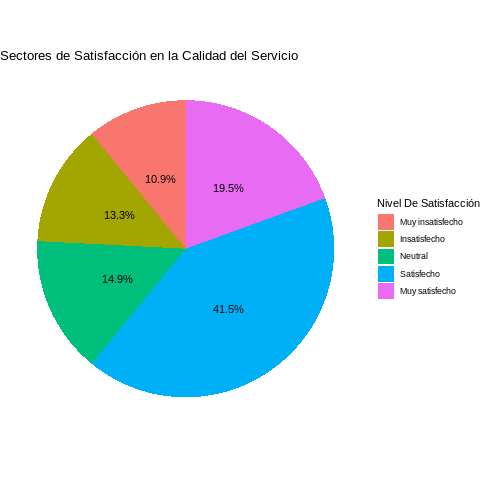

In [20]:
%%R
# Sectores (Gráfico de Tarta) para Satisfaccion_Calidad
satisfaccion_calidad_counts <- bd_satisfaccion %>%
  count(Satisfaccion_Calidad) %>%
  mutate(Satisfaccion_Calidad = factor(Satisfaccion_Calidad, levels = c("Muy insatisfecho", "Insatisfecho", "Neutral", "Satisfecho", "Muy satisfecho"))) %>%
  arrange(Satisfaccion_Calidad) %>%
  mutate(percentage = n / sum(n)) # Porcentajes

ggplot(satisfaccion_calidad_counts, aes(x = "", y = percentage, fill = Satisfaccion_Calidad)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  geom_text(aes(label = scales::percent(percentage)), position = position_stack(vjust = 0.5)) +
  labs(title = "Sectores de Satisfacción en la Calidad del Servicio", fill = "Nivel De Satisfacción") +
  theme_void()

# Ejercicio 3


La base de datos contiene datos sobre empleados en una empresa en la que se recoge el salario mensual, las horas trabajadas a la semana y la cantidad de proyectos en los que han participado. Las variables son las siguientes:
- ID: Identificador empleado.
- Salario_Mensual: Salario mensual del empleado en miles de dólares.
- Horas_Trabajadas_Semana: Cantidad de horas trabajadas por el empleado cada semana.
- Numero_ Proyectos: Número de proyectos en los que el empleado ha participado.

In [21]:
%%R

bd_empleados <- read_delim("/content/data/bd_empleados.csv",   delim = ";", escape_double = FALSE, trim_ws = TRUE)
head(bd_empleados)
spec(bd_empleados)



Rows: 350 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (4): ID, Salario_Mensual, Horas_Trabajadas_Semana, Numero_Proyectos

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
cols(
  ID = col_double(),
  Salario_Mensual = col_double(),
  Horas_Trabajadas_Semana = col_double(),
  Numero_Proyectos = col_double()
)


### a) Indica el tipo de variable que se está midiendo en cada una de las variables de esta base de datos.

- **ID**: Es un identificador para cada empleado.
  - **Variable Categórica Cualitativa Nominal**.
    - Es nominal porque los números no corresponden a ninguna cantidad o orden. Solo sirven para distinguir un empleado de otro de manera única. Pero es una medida **Nominal**.

- **Salario_Mensual**: Represent el salario mensual en miles de euros, creo.
  - Es un valor numérico continuo con un zero absoluto: **Variable Cuantitativa Continua**. De tipo **Ratio**.

- **Horas_Trabajadas_Semana**: Número de horas trabajadas por semana.
   - Valor numérico medible con zero absoluto: **Variable Cuantitativa Continua**, **Ratio**.

- **Numero_Proyectos**: Contabiliza el número de proyectos en los que ha participado el empleado.
  - Cuenta de manera discreta y tiene un zero: **Variable Cuantitativa Discreta**, Ratio.

### b) Construye la tabla de frecuencias adecuada para la variable Numero_Proyectos (no agrupes los datos en intervalos).

In [22]:
%%R
# Tabla de Frequencias Numero_Proyectos
numero_proyectos_freq <- bd_empleados %>%
  count(Numero_Proyectos) %>%
  mutate(
    fi = n / sum(n), # Relativa
    fi_porc = fi * 100 # Porcentual
  ) %>%
  arrange(Numero_Proyectos) %>%
  mutate(
      Ni = cumsum(n), # Frecuencia Absoluta Acumulada
      Fi = cumsum(fi), # Frecuencia Relativa Acumulada
      Fi_porc = Fi * 100 # Porcentual
 )


# En el display
print(numero_proyectos_freq)

# A tibble: 9 × 7
  Numero_Proyectos     n     fi fi_porc    Ni    Fi Fi_porc
             <dbl> <int>  <dbl>   <dbl> <int> <dbl>   <dbl>
1                0    90 0.257    25.7     90 0.257    25.7
2                1    34 0.0971    9.71   124 0.354    35.4
3                2    42 0.12     12      166 0.474    47.4
4                3    21 0.06      6      187 0.534    53.4
5                4    31 0.0886    8.86   218 0.623    62.3
6                5    25 0.0714    7.14   243 0.694    69.4
7                6    50 0.143    14.3    293 0.837    83.7
8                7    31 0.0886    8.86   324 0.926    92.6
9                8    26 0.0743    7.43   350 1       100  


### c) ¿Qué porcentaje de trabajadores no ha participado en ningún proyecto?

25.7%

### d) ¿Cuántos trabajadores han participado en 5 proyectos?
31

### e) ¿Qué porcentaje de trabajadores ha participado en 4 proyectos o menos?
53.4


### d) ¿Qué porcentaje de trabajadores ha participado en más de 5 proyectos?

In [23]:
100-62.3

37.7

g) Realiza el gráfico o gráficos adecuados para la variable Numero_Proyectos.

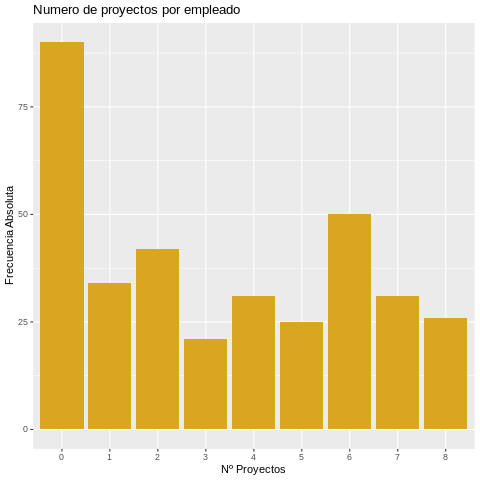

In [24]:
%%R
# Create a bar chart for Numero_Proyectos
ggplot(numero_proyectos_freq, aes(x = factor(Numero_Proyectos), y = n)) +
  geom_bar(stat = "identity", fill = "goldenrod") +
  xlab("Nº Proyectos") +
  ylab("Frecuencia Absoluta") +
  ggtitle("Numero de proyectos por empleado")

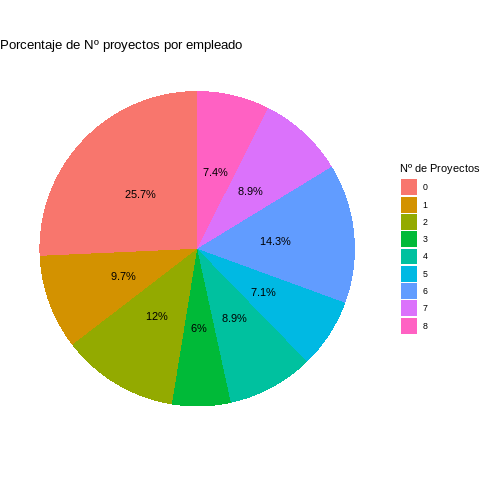

In [25]:
%%R
# Grafica de tarta de Numero_Proyectos
ggplot(numero_proyectos_freq, aes(x = "", y = fi_porc, fill = factor(Numero_Proyectos))) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  geom_text(aes(label = paste0(round(fi_porc, 1), "%")), position = position_stack(vjust = 0.5)) +
  labs(title = "Porcentaje de Nº proyectos por empleado", fill = "Nº de Proyectos") +
  theme_void()

### h) Construye la tabla de frecuencias con 6 intervalos para la variable Salario_Mensual.

In [26]:
%%R
# Determinar el máximo para determinar rangos
max_salario <- max(bd_empleados$Salario_Mensual)
alto_salario <- ceiling(max_salario )

cortes <- c(0, 1.5, 2.5, 3.5, 4.5, 5.5, alto_salario)

# Repartición
bd_empleados$Salario_Mensual_Interval <- cut(bd_empleados$Salario_Mensual, breaks = cortes, include.lowest = TRUE, right = FALSE)

# Tabla de frecuencia
salario_freq_grouped <- bd_empleados %>%
  count(Salario_Mensual_Interval) %>%
  mutate(
    fi = n / sum(n), # Frecuencia Relativa
    fi_porc = fi * 100 # Porcential
  ) %>%
  mutate(
      Ni = cumsum(n), # Frecuencia Absoluta Acumulada
      Fi = cumsum(fi), # Frecuencia Relativa Acumulada
      Fi_p = cumsum(fi)*100 # Frecuencia Relativa Acumulada
  )

# Mostrar
print(salario_freq_grouped)

# A tibble: 6 × 7
  Salario_Mensual_Interval     n     fi fi_porc    Ni     Fi   Fi_p
  <fct>                    <int>  <dbl>   <dbl> <int>  <dbl>  <dbl>
1 [0,1.5)                      9 0.0257    2.57     9 0.0257   2.57
2 [1.5,2.5)                   49 0.14     14       58 0.166   16.6 
3 [2.5,3.5)                  120 0.343    34.3    178 0.509   50.9 
4 [3.5,4.5)                  117 0.334    33.4    295 0.843   84.3 
5 [4.5,5.5)                   48 0.137    13.7    343 0.98    98   
6 [5.5,7]                      7 0.02      2      350 1      100   


### i) ¿Cuántos empleados cobran entre 3500 y 4500 dólares?
$117$ _empleados_

### j) ¿Qué porcentaje de empleados tiene un salario menor a 2500 dólares?
$16.6$ %

### k) ¿Qué porcentaje de empleados tiene un salario mayor a 4500 dólares?

In [27]:
100 - 98

2

### l) Realiza ahora la tabla de frecuencias mediante la librería summarytools.

Debido a un problema en Jupyter, he tenido que instalar una alternativa en Python:


In [51]:
%pip install jupyter-summarytools

In [56]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

with localconverter(ro.default_converter + pandas2ri.converter):
  bd_empleados_pandas = ro.conversion.rpy2py(ro.globalenv['bd_empleados'])

bd_empleados_pandas.head()

,ID,Salario_Mensual,Horas_Trabajadas_Semana,Numero_Proyectos,Salario_Mensual_Interval
1,1.0,3.33,31.8,7.0,"[2.5,3.5)"
2,2.0,1.30,29.9,5.0,"[0,1.5)"
3,3.0,3.29,37.8,0.0,"[2.5,3.5)"
4,4.0,2.73,35.5,2.0,"[2.5,3.5)"
5,5.0,4.01,45.4,6.0,"[3.5,4.5)"


In [57]:
import pandas as pd

bins = [0, 1.5, 2.5, 3.5, 4.5, 5.5, float('inf')]
labels = ['[0-1.5)', '[1.5-2.5)', '[2.5-3.5)', '[3.5-4.5)', '[4.5-5.5)', '[5.5-inf)']

# Create intervals and count frequencies
bd_empleados_pandas['Salario_Mensual_Interval_pd'] = pd.cut(bd_empleados_pandas['Salario_Mensual'], bins=bins, labels=labels, right=False, include_lowest=True)

salario_freq_pd = bd_empleados_pandas['Salario_Mensual_Interval_pd'].value_counts().reset_index()
salario_freq_pd.columns = ['Interval', 'Frequency']
salario_freq_pd = salario_freq_pd.sort_values('Interval')

# Calculate relative frequency and percentage
salario_freq_pd['Relative Frequency'] = salario_freq_pd['Frequency'] / salario_freq_pd['Frequency'].sum()
salario_freq_pd['Percentage'] = salario_freq_pd['Relative Frequency'] * 100

# Calculate cumulative frequencies
salario_freq_pd['Cumulative Frequency'] = salario_freq_pd['Frequency'].cumsum()
salario_freq_pd['Cumulative Relative Frequency'] = salario_freq_pd['Relative Frequency'].cumsum()
salario_freq_pd['Cumulative Percentage'] = salario_freq_pd['Percentage'].cumsum()


display(salario_freq_pd)

,Interval,Frequency,Relative Frequency,Percentage,Cumulative Frequency,Cumulative Relative Frequency,Cumulative Percentage
4,[0-1.5),9,0.025714,2.571429,9,0.025714,2.571429
2,[1.5-2.5),49,0.140000,14.000000,58,0.165714,16.571429
0,[2.5-3.5),120,0.342857,34.285714,178,0.508571,50.857143
1,[3.5-4.5),117,0.334286,33.428571,295,0.842857,84.285714
3,[4.5-5.5),48,0.137143,13.714286,343,0.980000,98.000000
5,[5.5-inf),7,0.020000,2.000000,350,1.000000,100.000000



## m) Realiza gráficos adecuados para la variable Salario_Mensual.






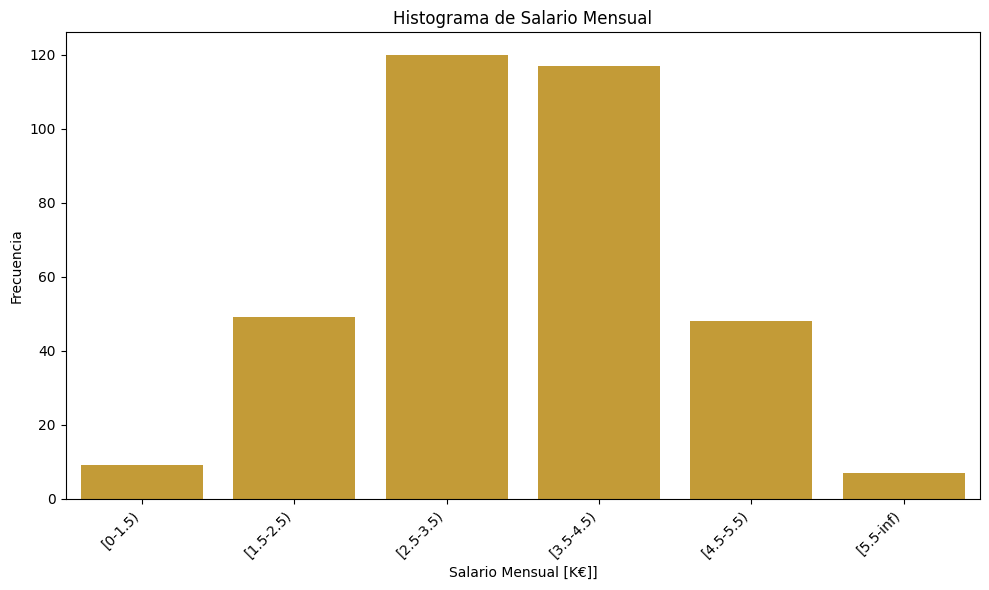

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a histogram
plt.figure(figsize=(10, 6))
sns.barplot(x='Interval', y='Frequency', data=salario_freq_pd, color='goldenrod')
plt.xlabel("Salario Mensual [K€]]")
plt.ylabel("Frecuencia Absoluta")
plt.title("Histograma de Salario Mensual")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


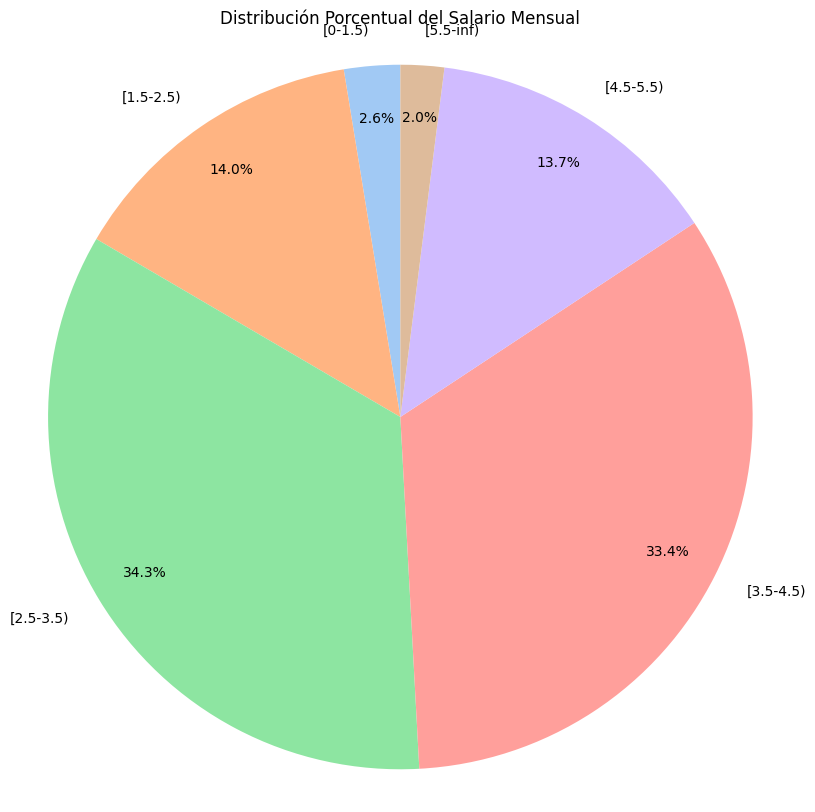

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pie chart
plt.figure(figsize=(10, 10)) # Increase figure size
plt.pie(salario_freq_pd['Percentage'], labels=salario_freq_pd['Interval'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), pctdistance=0.85) # Adjust pctdistance
plt.title('Distribución Porcentual del Salario Mensual')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

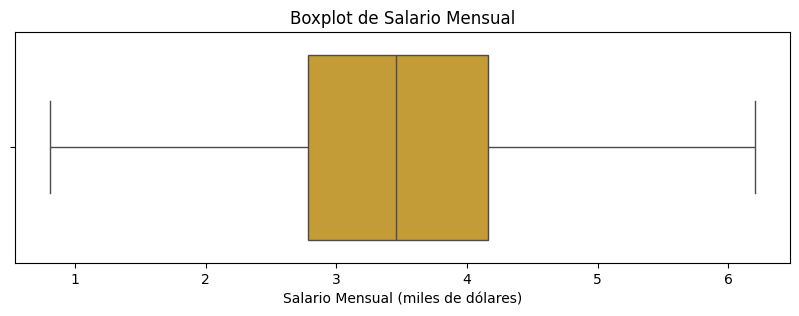

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for Salario_Mensual
plt.figure(figsize=(10, 3))
sns.boxplot(x=bd_empleados_pandas['Salario_Mensual'], color='goldenrod')
plt.xlabel("Salario Mensual (miles de Euros)")
plt.title("Boxplot de Salario Mensual")
plt.show()